<a href="https://colab.research.google.com/github/engineerinvestor/Portfolio-Analysis/blob/main/Tutorials/Asset_Correlations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Compute Asset Correlations

Author: Ryan Gavin ([@RyanMGavin](https://twitter.com/RyanMGavin))

Date: 05/28/24

Note: Stylistic editing and descriptions by Engineer Investor ([@egr_investor](https://twitter.com/egr_investor)).

## Introduction and Description

This Jupyter notebook focuses on analyzing asset correlations in the context of financial data. Correlation analysis is a crucial aspect of portfolio management, helping to understand the relationships between different assets and optimize the diversification benefits. By examining correlations, investors and analysts can make informed decisions about asset allocation, risk management, and overall investment strategies.

## Key Features of the Notebook

1. **Data Collection and Preparation:**
   - Importing necessary libraries and datasets.
   - Cleaning and preprocessing the data to ensure accuracy and consistency.
   - Calculating monthly returns for the selected assets.

2. **Correlation Matrix:**
   - Constructing a correlation matrix to visualize the static relationships between different pairs of assets.
   - Using heatmaps to provide a clear and intuitive understanding of the correlation strengths and patterns.

3. **Rolling Correlation Analysis:**
   - Implementing rolling window calculations to analyze how correlations between asset pairs evolve over time.
   - Plotting rolling correlations for various asset pairs to capture dynamic changes and trends in relationships.

4. **Visualization and Interpretation:**
   - Employing various plotting techniques to visualize both static and rolling correlations.
   - Interpreting the visualizations to draw meaningful insights about the interdependencies among assets.

## Objectives

- **Understand Static Correlations:** Gain insights into the static relationships between selected assets using correlation matrices.
- **Explore Dynamic Correlations:** Analyze how asset correlations change over time through rolling correlation analysis.
- **Enhance Portfolio Management:** Use correlation insights to make data-driven decisions in portfolio diversification and risk management.

## Tools and Libraries

The notebook utilizes a range of Python libraries for data manipulation, analysis, and visualization, including:
- `pandas`: For data manipulation and analysis.
- `numpy`: For numerical operations.
- `matplotlib` and `seaborn`: For creating static and interactive visualizations.
- `scipy`: For scientific computing and statistics.

This comprehensive approach to asset correlation analysis aims to provide a solid foundation for financial analysis and investment decision-making, leveraging the power of data science and visualization techniques.

## Code

### Load Packages and Initialize Environment

In [23]:
!pip install pandas numpy matplotlib seaborn yfinance

In [24]:
import pandas as pd
import numpy as np
import yfinance as yf
import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations

### Data Collection and Preparation

In [25]:
# Define the list of tickers and the time period
tickers = ['VTI', 'IEF', 'QMHIX', 'VXUS', 'GLD']  # Replace with your list of tickers
start_date = '2014-01-01'
end_date = '2023-01-01'

In [26]:
# Download the historical adjusted close prices for the tickers
data = yf.download(tickers, start = start_date, end = end_date)['Adj Close']

[*********************100%%**********************]  5 of 5 completed


In [27]:
# Calculate daily returns
returns = data.pct_change().dropna()

### Compute Correlation Matrix

In [28]:
# Calculate the correlation matrix
correlation_matrix = round(returns.corr(),2)

In [29]:
# Display the correlation matrix
print("Correlation Matrix:")
print(correlation_matrix)

Correlation Matrix:
Ticker   GLD   IEF  QMHIX   VTI  VXUS
Ticker                               
GLD     1.00  0.38   0.01  0.02  0.10
IEF     0.38  1.00  -0.11 -0.23 -0.22
QMHIX   0.01 -0.11   1.00 -0.12 -0.17
VTI     0.02 -0.23  -0.12  1.00  0.87
VXUS    0.10 -0.22  -0.17  0.87  1.00


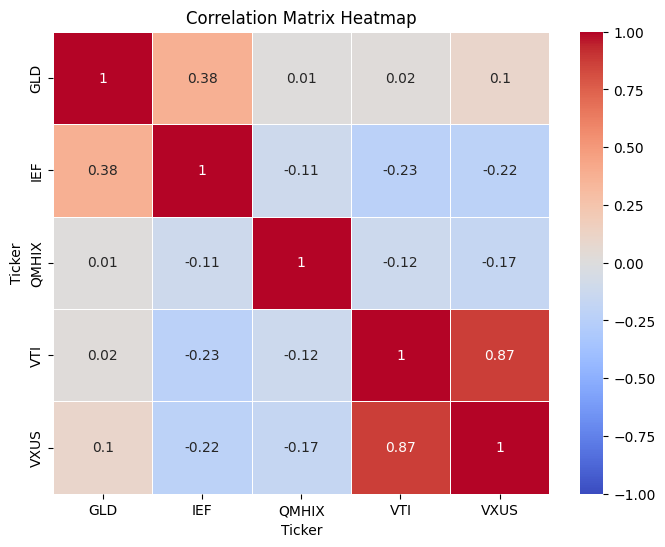

In [30]:
# Plot the correlation matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1, linewidths = 0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

### Rolling Correlation Analysis and Visualization

In [31]:
# Define the rolling window size (in months)
window_size = 36

In [32]:
# Resample the returns to monthly frequency
monthly_returns = returns.resample('M').sum()

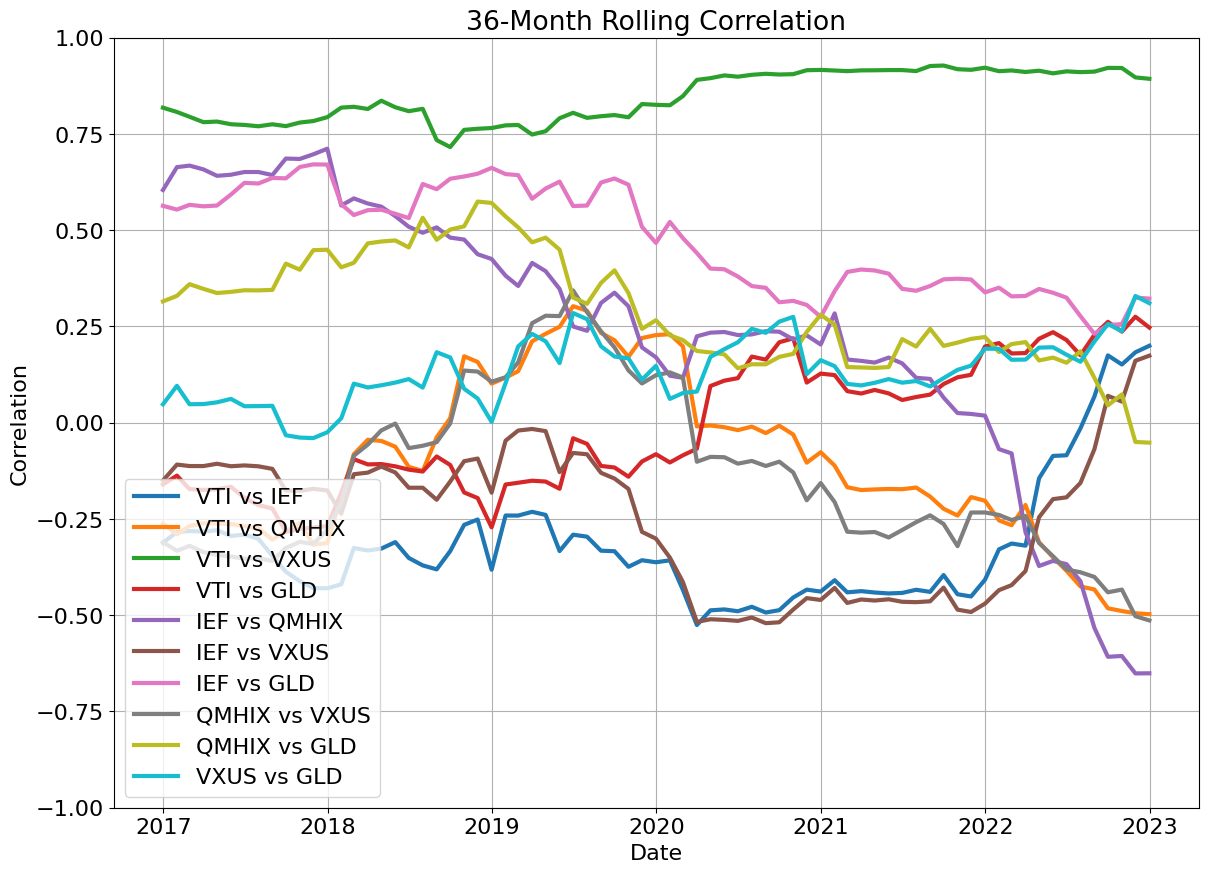

In [42]:
# Calculate and plot the rolling correlation for all possible pairs of tickers
plt.figure(figsize=(14, 10))
plt.rcParams.update({'font.size': 16})

for (ticker1, ticker2) in combinations(tickers, 2):
    rolling_corr = monthly_returns[ticker1].rolling(window = window_size).corr(monthly_returns[ticker2])
    plt.plot(rolling_corr, label = f'{ticker1} vs {ticker2}', linewidth = 3)

plt.title(f'{window_size}-Month Rolling Correlation')
plt.xlabel('Date')
plt.ylabel('Correlation')
plt.ylim(-1, 1)
plt.legend(loc='lower left')
plt.grid(True)
plt.show()